In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import cross_validate
from sklearn.impute import KNNImputer

In [2]:
def show_cross_validate(m, X, y, k=5):
    scoring = ['neg_mean_absolute_error', 'neg_root_mean_squared_error', 'max_error', 'r2']
    cv_results = cross_validate(estimator=m, X=X, y=y, cv=k, scoring=scoring)
    
    print('neg_mean_absolute_error: ', cv_results['test_neg_mean_absolute_error'].mean(),
         '\nroot_neg_mean_squared_error: ', cv_results['test_neg_root_mean_squared_error'].mean(),
         '\nmax_error: ', cv_results['test_max_error'].mean(),
         '\nR2_Score:', cv_results['test_r2'].mean())

# Carregando o _Dataset_

In [3]:
df = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
predictions = df_test[['Id']]

In [4]:
pd.set_option('max_columns', None)
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,Gas

In [5]:
df.drop(['Id'], axis=1, inplace=True)
df_test.drop(['Id'], axis=1, inplace=True)

# Análise Exploratória

In [6]:
df.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [7]:
# Subset de atributos categóricos, tratar antes da aplicação do modelo
catdf = df.select_dtypes(exclude=["number"])
catdf_col = list(catdf.columns)
catdf_col

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [8]:
# Percentual de NaN em cada coluna
(df.isna().sum()[df.isna().sum() > 0] / df.shape[0]).sort_values() * 100

Electrical       0.068493
MasVnrType       0.547945
MasVnrArea       0.547945
BsmtQual         2.534247
BsmtCond         2.534247
BsmtFinType1     2.534247
BsmtExposure     2.602740
BsmtFinType2     2.602740
GarageCond       5.547945
GarageQual       5.547945
GarageFinish     5.547945
GarageType       5.547945
GarageYrBlt      5.547945
LotFrontage     17.739726
FireplaceQu     47.260274
Fence           80.753425
Alley           93.767123
MiscFeature     96.301370
PoolQC          99.520548
dtype: float64

[Text(0.5, 0, 'Qualidade da piscina'), Text(0, 0.5, 'Preço de venda')]

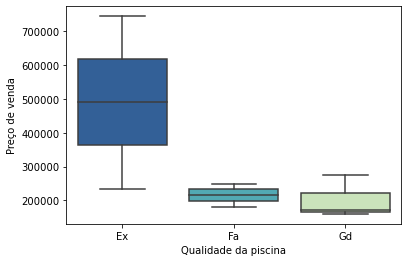

In [9]:
fig = sns.boxplot(x='PoolQC', y='SalePrice', data=df, palette='YlGnBu_r')
fig.set(xlabel='Qualidade da piscina', ylabel='Preço de venda')

In [10]:
df['PoolQC'].value_counts()

Gd    3
Ex    2
Fa    2
Name: PoolQC, dtype: int64

[Text(0.5, 0, 'Preço do diferencial'), Text(0, 0.5, 'Preço de venda')]

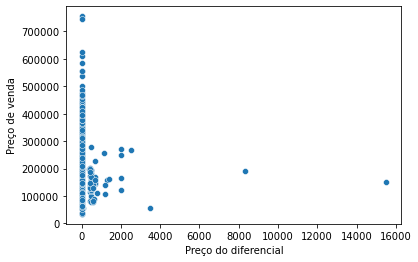

In [11]:
fig = sns.scatterplot(x='MiscVal', y='SalePrice', data=df)
fig.set(xlabel='Preço do diferencial', ylabel='Preço de venda')

In [12]:
df['MiscFeature'].value_counts()

Shed    49
Othr     2
Gar2     2
TenC     1
Name: MiscFeature, dtype: int64

[Text(0.5, 0, 'Tipo de rua'), Text(0, 0.5, 'Preço de venda')]

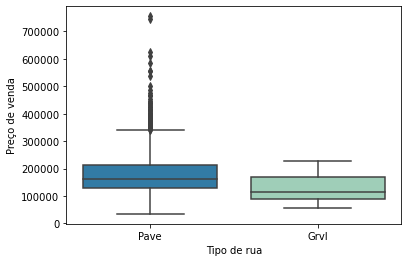

In [13]:
fig = sns.boxplot(x='Street', y='SalePrice', data=df, palette='YlGnBu_r')
fig.set(xlabel='Tipo de rua', ylabel='Preço de venda')

In [14]:
df['Street'].value_counts()

Pave    1454
Grvl       6
Name: Street, dtype: int64

[Text(0.5, 0, 'Preço de venda'), Text(0, 0.5, 'Quantidade')]

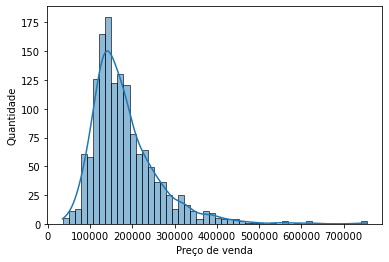

In [15]:
fig = sns.histplot(x='SalePrice', data=df, bins=50, kde=True)
fig.set(xlabel='Preço de venda', ylabel='Quantidade')

In [16]:
(df.corr()['SalePrice']).sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64

In [17]:
dfcorr = ((df.corr()['SalePrice']).to_frame())
dfcorr_col = list(dfcorr[(dfcorr.SalePrice > .3) | (dfcorr.SalePrice < -.3)].index)
dfcorr_col

['LotFrontage',
 'OverallQual',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'FullBath',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'SalePrice']

[Text(0.5, 1.0, 'Mapa de calor das correlações dos atributos')]

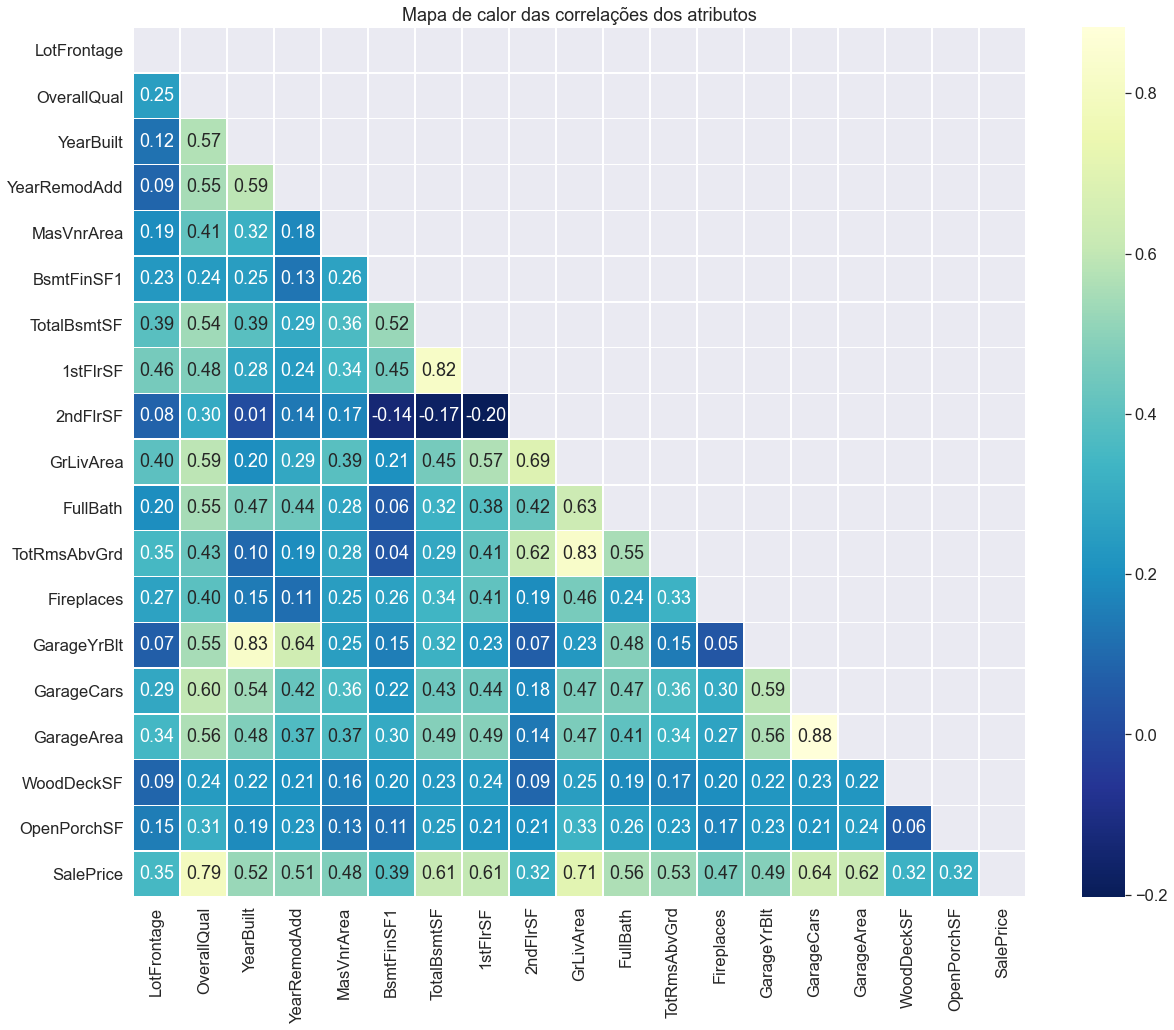

In [18]:
dfcorr = df[dfcorr_col + catdf_col]
dfcorr_col.remove('SalePrice')
dfcorr_test = df_test[dfcorr_col + catdf_col]
corr = dfcorr.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(20,16))
sns.set(font_scale=1.5)
h = sns.heatmap(corr, cmap='YlGnBu_r', annot=True, fmt='.2f', linewidths=.5, mask=mask)
h.set(title='Mapa de calor das correlações dos atributos')

[Text(0.5, 0, 'Qualidade geral'), Text(0, 0.5, 'Preço de venda')]

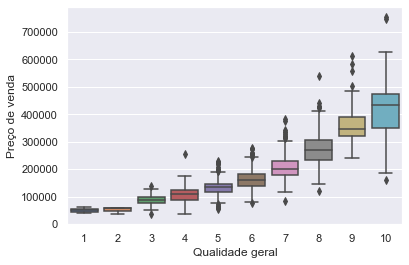

In [19]:
sns.set(font_scale=1)
fig = sns.boxplot(x='OverallQual', y='SalePrice', data=df)
fig.set(xlabel='Qualidade geral', ylabel='Preço de venda')

[Text(0.5, 0, 'Número de banheiros incompletos'),
 Text(0, 0.5, 'Preço de venda')]

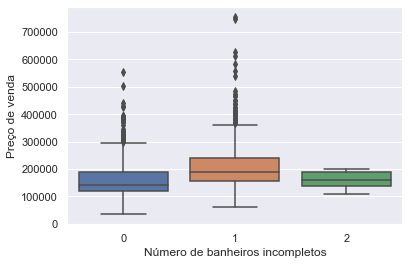

In [20]:
fig = sns.boxplot(x='HalfBath', y='SalePrice', data=df)
fig.set(xlabel='Número de banheiros incompletos', ylabel='Preço de venda')

In [21]:
df['HalfBath'].value_counts()

0    913
1    535
2     12
Name: HalfBath, dtype: int64

[Text(0.5, 0, 'Número de banheiros completos'), Text(0, 0.5, 'Preço de venda')]

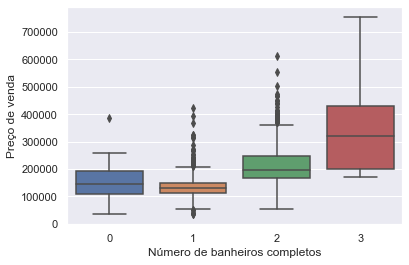

In [22]:
fig = sns.boxplot(x='FullBath', y='SalePrice', data=df)
fig.set(xlabel='Número de banheiros completos', ylabel='Preço de venda')

In [23]:
df['FullBath'].value_counts()

2    768
1    650
3     33
0      9
Name: FullBath, dtype: int64

[Text(0.5, 0, 'Número de quartos'), Text(0, 0.5, 'Preço de venda')]

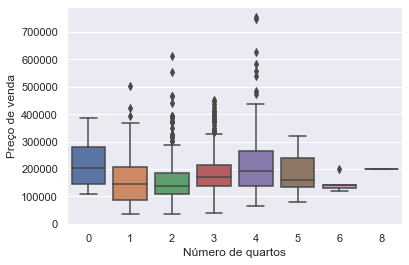

In [24]:
fig = sns.boxplot(x='BedroomAbvGr', y='SalePrice', data=df)
fig.set(xlabel='Número de quartos', ylabel='Preço de venda')

In [25]:
df['BedroomAbvGr'].value_counts()

3    804
2    358
4    213
1     50
5     21
6      7
0      6
8      1
Name: BedroomAbvGr, dtype: int64

[Text(0.5, 0, 'Número de carros que cabem na garagem'),
 Text(0, 0.5, 'Preço de venda')]

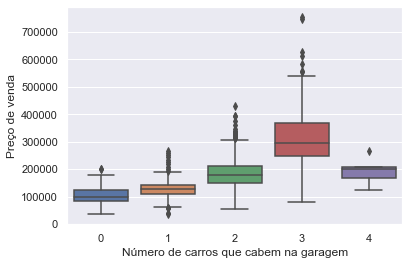

In [26]:
fig = sns.boxplot(x='GarageCars', y='SalePrice', data=df)
fig.set(xlabel='Número de carros que cabem na garagem', ylabel='Preço de venda')

In [27]:
df['FullBath'].value_counts()

2    768
1    650
3     33
0      9
Name: FullBath, dtype: int64

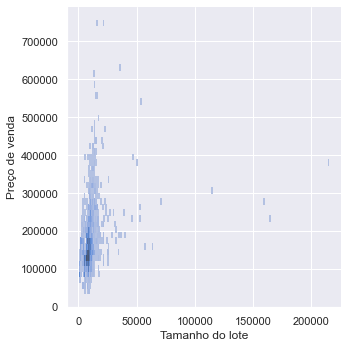

In [28]:
fig = sns.displot(x='LotArea', y='SalePrice', data=df)
fig.set(xlabel='Tamanho do lote', ylabel='Preço de venda')

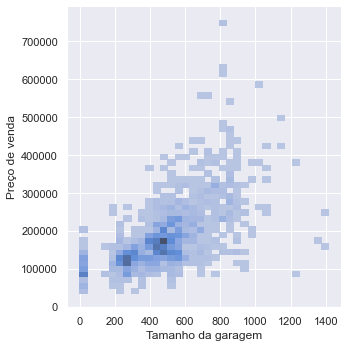

In [29]:
fig = sns.displot(x='GarageArea', y='SalePrice', data=df)
fig.set(xlabel='Tamanho da garagem', ylabel='Preço de venda')

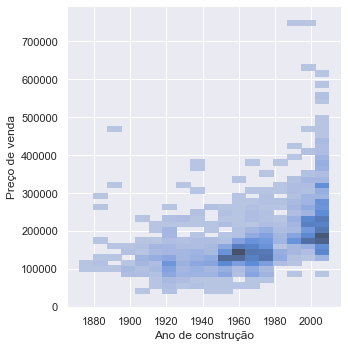

In [30]:
fig = sns.displot(x='YearBuilt', y='SalePrice', data=df)
fig.set(xlabel='Ano de construção', ylabel='Preço de venda')

# Elaboração do modelo

In [31]:
# Dropar colunas com muitos NaN
df.drop(['Fence', 'Alley', 'MiscFeature','PoolQC'], axis=1, inplace=True)
df_test.drop(['Fence', 'Alley', 'MiscFeature','PoolQC'], axis=1, inplace=True)

In [32]:
dfcorrected = pd.get_dummies(dfcorr, prefix=catdf.columns)
dfcorrected_test = pd.get_dummies(dfcorr_test, prefix=catdf.columns)

In [33]:
# Checando novamente o percentual de NaN em cada coluna
(dfcorrected.isna().sum()[dfcorrected.isna().sum() > 0] / dfcorrected.shape[0]).sort_values() * 100

MasVnrArea      0.547945
GarageYrBlt     5.547945
LotFrontage    17.739726
dtype: float64

In [34]:
dfcorrected[['MasVnrArea', 'GarageYrBlt', 'LotFrontage']].dtypes

MasVnrArea     float64
GarageYrBlt    float64
LotFrontage    float64
dtype: object

In [35]:
# Dropar colunas diferentes entre dataset de treino e teste (resultado do get_dummies)
A = set(dfcorrected.columns)
B = set(dfcorrected_test.columns)
drop_train = list(A.difference(B))
drop_test = list(B.difference(A))

In [36]:
drop_train.remove('SalePrice')

In [37]:
dfcorrected.drop(drop_train, axis=1, inplace=True)
dfcorrected_test.drop(drop_test, axis=1, inplace=True)

In [38]:
dfcorrected['SalePrice']

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [39]:
# Normalizando a distribuição da variável dependente e a removendo do dataframe
y_train = np.log(dfcorrected['SalePrice'])
dfcorrected.pop('SalePrice')

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [40]:
# Imputação dos dados faltantes com KNN
imputer = KNNImputer()
dfcorrected[:] = imputer.fit_transform(dfcorrected)
dfcorrected_test[:] = imputer.transform(dfcorrected_test)

In [41]:
# Remoção de features com variáncia inferior a 10%
sel = VarianceThreshold(threshold=0.1)
sel.fit(dfcorrected)
dfcorrected = dfcorrected.loc[:, sel.get_support()]
dfcorrected_test = dfcorrected_test.loc[:, sel.get_support()]

In [42]:
# Remoção de festures com correlação acima de 90%
dfcorrected_corr = dfcorrected.corr().abs()
upper_tri = dfcorrected_corr.where(np.triu(np.ones(dfcorrected_corr.shape),k=1).astype(np.bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.9)]
print(to_drop)

['LotShape_Reg', 'RoofStyle_Hip', 'Exterior2nd_MetalSd', 'Exterior2nd_VinylSd', 'ExterQual_TA']


In [43]:
dfcorrected.drop(to_drop, axis=1, inplace=True)
dfcorrected_test.drop(to_drop, axis=1, inplace=True)

In [44]:
dfcorrected

,LotFrontage,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,MSZoning_RL,MSZoning_RM,LotShape_IR1,LotConfig_Corner,LotConfig_Inside,Neighborhood_NAmes,Condition1_Norm,BldgType_1Fam,HouseStyle_1Story,HouseStyle_2Story,RoofStyle_Gable,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior2nd_HdBoard,Exterior2nd_Wd Sdng,MasVnrType_BrkFace,MasVnrType_None,ExterQual_Gd,ExterCond_TA,Foundation_CBlock,Foundation_PConc,BsmtQual_Gd,BsmtQual_TA,BsmtExposure_Av,BsmtExposure_No,BsmtFinType1_ALQ,BsmtFinType1_GLQ,BsmtFinType1_Unf,BsmtFinType2_Unf,HeatingQC_Ex,HeatingQC_Gd,HeatingQC_TA,KitchenQual_Gd,KitchenQual_TA,FireplaceQu_Gd,FireplaceQu_TA,GarageType_Attchd,GarageType_Detchd,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,SaleType_WD,SaleCondition_Normal
0,65.0,7.0,2003.0,2003.0,196.0,706.0,856.0,856.0,854.0,1710.0,2.0,8.0,0.0,2003.0,2.0,548.0,0.0,61.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0
1,80.0,6.0,1976.0,1976.0,0.0,978.0,1262.0,1262.0,0.0,1262.0,2.0,6.0,1.0,1976.0,2.0,460.0,298.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0
2,68.0,7.0,2001.0,2002.0,162.0,486.0,920.0,920.0,866.0,1786.0,2.0,6.0,1.0,2001.0,2.0,608.0,0.0,42.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0
3,60.0,7.0,1915.0,1970.0,0.0,216.0,756.0,961.0,756.0,1717.0,1.0,7.0,1.0,1998.0,3.0,642.0,0.0,35.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
4,84.0,8.0,2000.0,2000.0,350.0,655.0,1145.0,1145.0,1053.0,2198.0,2.0,9.0,1.0,2000.0,3.0,836.0,192.0,84.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,62.0,6.0,1999.0,2000.0,0.0,0.0,953.0,953.0,694.0,1647.0,2.0,7.0,1.0,1999.0,2.0,460.0,0.0,40.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0
1456,85.0,6.0,1978.0,1988.0,119.0,790.0,1542.0,2073.0,0.0,2073.0,2.0,7.0,2.0,1978.0,2.0,500.0,349.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0
1457,66.0,7.0,1941.0,2006.0,0.0,275.0,1152.0,1188.0,1152.0,2340.0,2.0,9.0,2.0,1941.0,1.0,252.0,0.0,60.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0
1458,68.0,5.0,1950.0,1996.0,0.0,49.0,1078.0,1078.0,0.0,1078.0,1.0,5.0,0.0,1950.0,1.0,240.0,366.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0


In [45]:
X_train = dfcorrected.to_numpy()
X_test = dfcorrected_test.to_numpy()
print(X_train.shape, X_test.shape)

(1460, 63) (1459, 63)


In [46]:
# Análise de feature importance através de um modelo de árvore de decisão
features_names = dfcorrected.columns
reg = DecisionTreeRegressor()
reg.fit(X_train, y_train)

DecisionTreeRegressor()

Text(0.5, 1.0, 'Importância das variáveis modelo preditivo - Regressão')

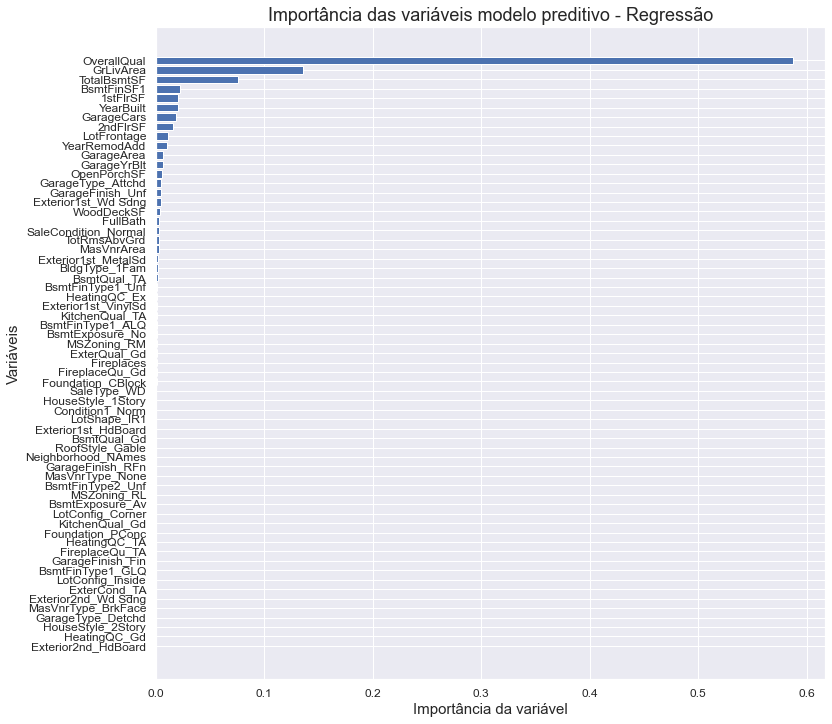

In [47]:
plt.rc('figure', figsize = (12,12))
features = {key: value for key, value in zip(features_names, reg.feature_importances_)}
features = {key: value for key, value in sorted(features.items(), key=lambda item: item[1])}
_ = plt.barh(np.arange(len(features)), features.values(), align="center")
_ = plt.yticks(range(len(features)), features.keys())
plt.tick_params('y', labelsize=12)
plt.tick_params('x', labelsize=12)
plt.xlabel('Importância da variável', fontsize=15)
plt.ylabel('Variáveis', fontsize=15)
plt.title('Importância das variáveis modelo preditivo - Regressão', fontsize=18)

In [48]:
# Remoção das features de baixa importância
select = [key for key, value in features.items() if value > 0.002]
select

['BsmtQual_TA',
 'BldgType_1Fam',
 'Exterior1st_MetalSd',
 'MasVnrArea',
 'TotRmsAbvGrd',
 'SaleCondition_Normal',
 'FullBath',
 'WoodDeckSF',
 'Exterior1st_Wd Sdng',
 'GarageFinish_Unf',
 'GarageType_Attchd',
 'OpenPorchSF',
 'GarageYrBlt',
 'GarageArea',
 'YearRemodAdd',
 'LotFrontage',
 '2ndFlrSF',
 'GarageCars',
 'YearBuilt',
 '1stFlrSF',
 'BsmtFinSF1',
 'TotalBsmtSF',
 'GrLivArea',
 'OverallQual']

In [49]:
dfcorrected = dfcorrected[select]
dfcorrected_test = dfcorrected_test[select]
X_train = dfcorrected.to_numpy()
X_test = dfcorrected_test.to_numpy()
print(X_train.shape, X_test.shape)

(1460, 24) (1459, 24)


In [50]:
# Realização de grid search para o tuning de hiperparâmetros do modelo de random forest
param_grid = {
    'n_estimators': np.arange(50, 301, 50),
    'max_features': [None, X_train.shape[1]//2, X_train.shape[1]//4, X_train.shape[1]//8, X_train.shape[1]//16]
}

rf_gs = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, n_jobs=-1, cv=5, verbose=10)
rf_gs.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    5.4s
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    7.1s
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:    8.3s
[Parallel(n_jobs=-1)]: Done  40 tasks      | elapsed:    9.6s
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:   10.7s
[Parallel(n_jobs=-1)]: Done  66 tasks      | elapsed:   11.9s
[Parallel(n_jobs=-1)]: Done  81 tasks      | elapsed:   13.1s
[Parallel(n_jobs=-1)]: Done  96 tasks      | elapsed:   14.1s
[Parallel(n_jobs=-1)]: Done 113 tasks      | elapsed:   15.0s
[Parallel(n_jobs=-1)]: Done 135 out of 150 | elapsed:   16.3s remaining:    1.7s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:   17.1s finished


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_features': [None, 12, 6, 3, 1],
                         'n_estimators': array([ 50, 100, 150, 200, 250, 300])},
             verbose=10)

In [51]:
rf_gs.best_estimator_

RandomForestRegressor(max_features=12, n_estimators=300, random_state=42)

In [52]:
# Avaliação do modelo por cross-validation
modelo = RandomForestRegressor(max_features=11, n_estimators=150, random_state=42)
show_cross_validate(modelo, X_train, y_train, 5)

neg_mean_absolute_error:  -0.10107705691651023 
root_neg_mean_squared_error:  -0.14995220835799056 
max_error:  -0.9041745610306101 
R2_Score: 0.8582583918383033


In [53]:
# Fazendo a predição do dataset de teste
modelo.fit(X_train, y_train)
y_predict = modelo.predict(X_test)

# Salvando o dataframe de predição e exportando o CSV

In [54]:
predictions.insert(1, 'SalePrice', np.exp(y_predict))

In [55]:
predictions

,Id,SalePrice
0,1461,123747.237519
1,1462,152325.030023
2,1463,179241.945220
3,1464,185896.656100
4,1465,197154.119107
...,...,...
1454,2915,78047.050244
1455,2916,82163.647619
1456,2917,143474.238387
1457,2918,115125.217703


In [56]:
predictions.to_csv('predict.csv', index=False)